In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_rows = 10
df = pd.read_csv('fake_job_postings.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


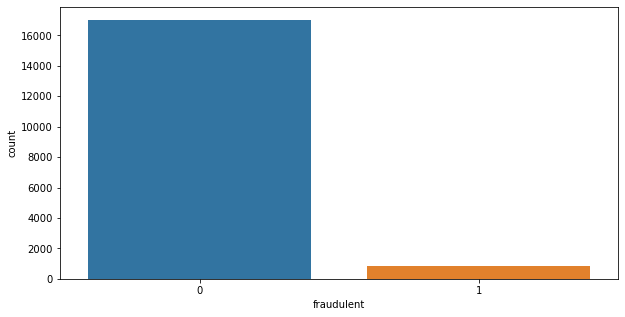

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(df['fraudulent']);

In [4]:
(df[df['fraudulent'] == 0].shape[0])/df.shape[0]

0.9515659955257271

# UNBALANCE DATA

# Data Preprocessing

In [5]:
def Information (df) :
    df.replace('?' , np.nan , inplace = True )
    nulls = (df.shape[0] - df.dropna(axis = 0).shape[0])
    nulls_per = (df.shape[0] - df.dropna(axis = 0).shape[0]) / df.shape[0]
    dup , dup_per = df.duplicated().sum() , (df.duplicated().sum()) / df.shape[0]
    numerical_columns = list((df.select_dtypes(include=np.number)).columns)
    categorical_columns = list(df.select_dtypes(include = ['object']).columns)
    numerical_col_dict = {}
    for col in numerical_columns :
        if df[col].nunique() > 10 :
            numerical_col_dict[col] = 'Continuous' 

        else :
            numerical_col_dict[col] = 'Discrete'
    categorical_col_dict = {}
    for col in categorical_columns :
        if df[col].nunique() > 10 :
            categorical_col_dict[col] = 'Continuous' 

        else :
            categorical_col_dict[col] = 'Classes'
    x = []
    for col in df.columns : 
        x.append([col , df[col].unique() ,df[col].nunique(),df[col].dtype,df[col].isna().sum(),int((df[col].isna().sum())/df.shape[0] * 100)  ])

    x = pd.DataFrame(x ,columns=['Feature','Unique_Values','No.OfUniqueValues','DataType','NoOfNulls','Nulls %'])

    print('\n','There is : {}  Nulls, Representing {} % of The Data'.format(nulls , '%.2f'%nulls_per ))
    print('\n','There is : {}  Duplicated, Representing {} % of The Data'.format(dup , '%.2f'%dup_per))
    print('\n','Numerical Columns : {}'.format(numerical_col_dict))
    print('\n','Categorical Columns : {}'.format(categorical_col_dict))

    return x

In [6]:
pd.options.display.max_rows = None
Information(df)


 There is : 17106  Nulls, Representing 0.96 % of The Data

 There is : 0  Duplicated, Representing 0.00 % of The Data

 Numerical Columns : {'job_id': 'Continuous', 'telecommuting': 'Discrete', 'has_company_logo': 'Discrete', 'has_questions': 'Discrete', 'fraudulent': 'Discrete'}

 Categorical Columns : {'title': 'Continuous', 'location': 'Continuous', 'department': 'Continuous', 'salary_range': 'Continuous', 'company_profile': 'Continuous', 'description': 'Continuous', 'requirements': 'Continuous', 'benefits': 'Continuous', 'employment_type': 'Classes', 'required_experience': 'Classes', 'required_education': 'Continuous', 'industry': 'Continuous', 'function': 'Continuous'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,job_id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",17880,int64,0,0
1,title,"[Marketing Intern, Customer Service - Cloud Vi...",11231,object,0,0
2,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,346,1
3,department,"[Marketing, Success, nan, Sales, ANDROIDPIT, H...",1337,object,11547,64
4,salary_range,"[nan, 20000-28000, 100000-120000, 120000-15000...",874,object,15012,83
5,company_profile,"[We're Food52, and we've created a groundbreak...",1709,object,3308,18
6,description,"[Food52, a fast-growing, James Beard Award-win...",14801,object,1,0
7,requirements,[Experience with content management systems a ...,11968,object,2695,15
8,benefits,"[nan, What you will get from usThrough being p...",6205,object,7210,40
9,telecommuting,"[0, 1]",2,int64,0,0


In [7]:
df.drop('job_id' , axis = 1 ,inplace = True)

In [8]:
pd.options.display.max_rows = 10
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [9]:
df.reset_index(drop=True ,inplace=True)

# Impute Nulls

In [10]:
df['location'] = df['location'].fillna(value = df['location'].value_counts().index[0] )

In [11]:
for idx in (df[df['department'].isna()]['title'].index) :
    if 'Marketing' in df.at[idx ,'title' ] :
        df.at[idx , 'department'] = 'Marketing'
    elif 'Sales' in df.at[idx ,'title' ] :
        df.at[idx , 'department'] = 'Sales'
    elif ('Accountant' in df.at[idx ,'title' ])|('Accounting' in df.at[idx ,'title' ] ) :
        df.at[idx , 'department'] = 'Accounting'
    elif ('Engineer' in df.at[idx ,'title' ] )|('Engineering' in df.at[idx ,'title' ] ) :
        df.at[idx , 'department'] = 'Engineering'
    else :
        df.at[idx , 'department'] = df.at[idx , 'title']
    

In [12]:
for idx in (df['salary_range'].dropna()).index :
    Range = df.at[idx , 'salary_range'].split('-')
    try :
        start = int(Range[0])
        if start < 1000 :
            df.at[idx ,'salary_range' ] = 0
        else :
            df.at[idx ,'salary_range' ] = start
            
    except ValueError :
        df.at[idx ,'salary_range' ] = 0
        
df['salary_range'] = df['salary_range'].fillna(0)

In [13]:
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Commissioning Machinery Assistant (CMA),0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Bill Review Manager,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Engineering,0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",Graphic Designer,0,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [14]:
df[['company_profile' , 'description','requirements','benefits']] = df[['company_profile' , 'description','requirements','benefits']].fillna('no available data')

In [15]:
pd.options.display.max_rows = None
Information(df)


 There is : 10265  Nulls, Representing 0.57 % of The Data

 There is : 285  Duplicated, Representing 0.02 % of The Data

 Numerical Columns : {'salary_range': 'Continuous', 'telecommuting': 'Discrete', 'has_company_logo': 'Discrete', 'has_questions': 'Discrete', 'fraudulent': 'Discrete'}

 Categorical Columns : {'title': 'Continuous', 'location': 'Continuous', 'department': 'Continuous', 'company_profile': 'Continuous', 'description': 'Continuous', 'requirements': 'Continuous', 'benefits': 'Continuous', 'employment_type': 'Classes', 'required_experience': 'Classes', 'required_education': 'Continuous', 'industry': 'Continuous', 'function': 'Continuous'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,title,"[Marketing Intern, Customer Service - Cloud Vi...",11231,object,0,0
1,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,0,0
2,department,"[Marketing, Success, Commissioning Machinery A...",7151,object,0,0
3,salary_range,"[0, 20000, 100000, 120000, 50000, 40000, 65000...",189,int64,0,0
4,company_profile,"[We're Food52, and we've created a groundbreak...",1710,object,0,0
5,description,"[Food52, a fast-growing, James Beard Award-win...",14802,object,0,0
6,requirements,[Experience with content management systems a ...,11969,object,0,0
7,benefits,"[no available data, What you will get from usT...",6206,object,0,0
8,telecommuting,"[0, 1]",2,int64,0,0
9,has_company_logo,"[1, 0]",2,int64,0,0


In [16]:
df[['industry' , 'function']] = df[['industry' , 'function']].fillna('')
df['job_field'] = df['title'] +' '+ df['department'] +' '+ df['industry'] +' '+ df['function']
df.drop(['title','department','industry','function'] , axis = 1 , inplace = True )

In [17]:
pd.options.display.max_rows = None
Information(df)


 There is : 9546  Nulls, Representing 0.53 % of The Data

 There is : 285  Duplicated, Representing 0.02 % of The Data

 Numerical Columns : {'salary_range': 'Continuous', 'telecommuting': 'Discrete', 'has_company_logo': 'Discrete', 'has_questions': 'Discrete', 'fraudulent': 'Discrete'}

 Categorical Columns : {'location': 'Continuous', 'company_profile': 'Continuous', 'description': 'Continuous', 'requirements': 'Continuous', 'benefits': 'Continuous', 'employment_type': 'Classes', 'required_experience': 'Classes', 'required_education': 'Continuous', 'job_field': 'Continuous'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,0,0
1,salary_range,"[0, 20000, 100000, 120000, 50000, 40000, 65000...",189,int64,0,0
2,company_profile,"[We're Food52, and we've created a groundbreak...",1710,object,0,0
3,description,"[Food52, a fast-growing, James Beard Award-win...",14802,object,0,0
4,requirements,[Experience with content management systems a ...,11969,object,0,0
5,benefits,"[no available data, What you will get from usT...",6206,object,0,0
6,telecommuting,"[0, 1]",2,int64,0,0
7,has_company_logo,"[1, 0]",2,int64,0,0
8,has_questions,"[0, 1]",2,int64,0,0
9,employment_type,"[Other, Full-time, nan, Part-time, Contract, T...",5,object,3471,19


In [18]:
df[['employment_type','required_experience','required_education']] = df[['employment_type','required_experience','required_education']].fillna('Other')

In [19]:
df['Requirements'] = df['requirements'] +' ' + df['required_experience'] +' ' + df['required_education']
df.drop(['requirements','required_experience','required_education'],axis =  1 ,inplace = True )

In [20]:
pd.options.display.max_rows = None
Information(df)


 There is : 0  Nulls, Representing 0.00 % of The Data

 There is : 285  Duplicated, Representing 0.02 % of The Data

 Numerical Columns : {'salary_range': 'Continuous', 'telecommuting': 'Discrete', 'has_company_logo': 'Discrete', 'has_questions': 'Discrete', 'fraudulent': 'Discrete'}

 Categorical Columns : {'location': 'Continuous', 'company_profile': 'Continuous', 'description': 'Continuous', 'benefits': 'Continuous', 'employment_type': 'Classes', 'job_field': 'Continuous', 'Requirements': 'Continuous'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,0,0
1,salary_range,"[0, 20000, 100000, 120000, 50000, 40000, 65000...",189,int64,0,0
2,company_profile,"[We're Food52, and we've created a groundbreak...",1710,object,0,0
3,description,"[Food52, a fast-growing, James Beard Award-win...",14802,object,0,0
4,benefits,"[no available data, What you will get from usT...",6206,object,0,0
5,telecommuting,"[0, 1]",2,int64,0,0
6,has_company_logo,"[1, 0]",2,int64,0,0
7,has_questions,"[0, 1]",2,int64,0,0
8,employment_type,"[Other, Full-time, Part-time, Contract, Tempor...",5,object,0,0
9,fraudulent,"[0, 1]",2,int64,0,0


In [21]:
pd.options.display.max_rows = 10

# Text Preprocessing

In [22]:
import re
from nltk.corpus import stopwords 
import string 
from nltk.stem import WordNetLemmatizer
punc = string.punctuation
lmt = WordNetLemmatizer()
s_words = stopwords.words('english')

In [35]:
class TextPreprocessing() :
    def __init__(self, df : pd.DataFrame = pd.DataFrame) :
        self.df = df
        
        
    def Clean(self , df) :
        self.df = df
        df_copy = df.copy(deep = True)
        text_cols = list(df_copy.select_dtypes(include = ['object']).columns)
        for col in text_cols :
            for idx, text in enumerate(df_copy[col]) :
                te = []
                word = re.sub(r'(@|#)\w+' , '' , text)
                word = re.sub("[,.]", "", word)
                word = re.sub(r'https?://\S+' , '' , word)
                word = re.sub(r'(\?|!)+' , '' , word)
                word = re.sub(r"\(|\)", "", word)
                word = re.sub(r'(^\s+)' , '' , word)
                word = re.sub(r'(\s+$)' , '' , word)
                word = re.sub(r'\d+' , '' , word)
                word = word.split()
                for i in word :
                    if (i not in s_words) & (i not in punc) :
                        i = i.lower()
                        i = lmt.lemmatize(i , 'v')
                        te.append(i)
                df_copy.at[idx , col] = te
        return df_copy
    
    def Vactorize (self, df , target_name) :
        self.df = df
        self.target_name = target_name
        df_cleaned = df.copy(deep = True)
        text_cols = list(df_cleaned.select_dtypes(include = ['object']).columns)
        pos_word = {}
        neg_word = {}

        pos_df = df_cleaned[df_cleaned[target_name] == 1].reset_index(drop=True)
        neg_df = df_cleaned[df_cleaned[target_name] == 0].reset_index(drop=True)
        
        for col in text_cols :

            pos_word[col] = [word for sublist in pos_df[col] for word in sublist]
            neg_word[col] = [word for sublist in neg_df[col] for word in sublist]



        pos_freq = {}
        neg_freq = {}
        for key in pos_word.keys() :
            positive_dict = {}
            for word in pos_word[key] :
                positive_dict[word] = positive_dict.get(word , 0) + 1

            pos_freq[key] = positive_dict


        for key in neg_word.keys() :
            negative_dict = {}
            for word in neg_word[key] :
                negative_dict[word] = negative_dict.get(word , 0) + 1

            neg_freq[key] = negative_dict
            
        return pos_freq , neg_freq

        
        
        
    def Vactorization (self , df , target_name) :
        self.df = df
        self.target_name = target_name
        df_cleaned = df.copy(deep = True)
        text_cols = list(df_cleaned.select_dtypes(include = ['object']).columns)
        pos_freq , neg_freq = TextPreprocessing().Vactorize(df_cleaned , target_name)

        for col in text_cols :
            df_cleaned['{}_pos'.format(col)] = 0
            df_cleaned['{}_neg'.format(col)] = 0
            for idx, List in enumerate(df_cleaned[col]) :
                pos_frequent = 0
                neg_frequent = 0
                for word in List :
                    pos_frequent += pos_freq[col].get(word , 0)
                    neg_frequent += neg_freq[col].get(word , 0)



                df_cleaned.at[idx ,'{}_pos'.format(col)] = pos_frequent
                df_cleaned.at[idx ,'{}_neg'.format(col)] = neg_frequent
            df_cleaned.drop([col] , axis = 1 , inplace = True)
        return df_cleaned
    
    
    def fit_transform(self , df , target_name) :
        self.df = df
        self.target_name = target_name
        
        df_cleaned = TextPreprocessing().Clean(df)
        df_vact = TextPreprocessing().Vactorization(df_cleaned , target_name)
        
        return df_vact
    
    
    def Naive_Bayes(self , df, target_name) :
        self.df = df
        self.target_name = target_name
        df_naive = TextPreprocessing().Clean(df)
        pos_freq , neg_freq = TextPreprocessing().Vactorize(df_naive , target_name)
        text_cols = list(df_naive.select_dtypes(include = ['object']).columns)
        
        v_n_pos , v_n_neg = {} , {}

        for key in pos_freq.keys() :
            v_n_pos[key] = len(pos_freq[key])
            n = 0
            for word in pos_freq[key] :
                n += pos_freq[key].get(word , 0)
            v_n_pos[key]+=n
        for key in neg_freq.keys() :
            v_n_neg[key] = len(neg_freq[key])
            n = 0
            for word in neg_freq[key] :
                n += neg_freq[key].get(word , 0)
            v_n_neg[key]+=n
            
            
        prob_pos_dict = {}
        for key in pos_freq.keys():
            positive_dict = {}
            for word in pos_freq[key] :
                positive_dict[word] = (pos_freq[key].get(word , 0) + 1) / (v_n_pos[key])
            prob_pos_dict[key] = positive_dict




        prob_neg_dict = {}
        for key in neg_freq.keys():
            negative_dict = {}
            for word in neg_freq[key] :
                negative_dict[word] = (neg_freq[key].get(word , 0) + 1) / (v_n_neg[key])
            prob_neg_dict[key] = negative_dict
            
            
            
        for col in text_cols :
            df_naive['{}_probs'.format(col)] = 0
            for idx, List in enumerate(df_naive[col]) :
                score = 0
                for word in List :
                    try :
                        b = np.log((prob_pos_dict[col].get(word , 0)) / (prob_neg_dict[col].get(word , 0)))
                        if b == -float('inf') :
                            pass
                        else :
                            score +=b
                    except :
                        pass

                df_naive['{}_probs'.format(col)][idx] = score
            df_naive.drop([col] , axis = 1 , inplace = True)
            
            
        return {'probs_pos':prob_pos_dict ,'probs_neg':prob_neg_dict } , df_naive        

# Clean Text

In [36]:
pre = TextPreprocessing()
df_cleaned = pre.Clean(df)
df_cleaned

,location,salary_range,company_profile,description,benefits,telecommuting,has_company_logo,has_questions,employment_type,fraudulent,job_field,Requirements
0,"[us, ny, new, york]",0,"[we're, food, we've, create, groundbreaking, a...","[food, fast-growing, jam, beard, award-winning...","[available, data]",0,1,0,[other],0,"[market, intern, market, market]","[experience, content, management, systems, maj..."
1,"[nz, auckland]",0,"[second, worlds, cloud, video, production, ser...","[organise, focus, vibrant, awesomedo, passion,...","[what, get, usthrough, part, second, team, gai...",0,1,0,[full-time],0,"[customer, service, cloud, video, production, ...","[what, expect, you:your, key, responsibility, ..."
2,"[us, ia, wever]",0,"[valor, service, provide, workforce, solutions...","[our, client, locate, houston, actively, seek,...","[available, data]",0,1,0,[other],0,"[commission, machinery, assistant, cma, commis...","[implement, pre-commissioning, commission, pro..."
3,"[us, dc, washington]",0,"[our, passion, improve, quality, life, geograp...","[the, company:, esri, –, environmental, system...","[our, culture, anything, corporate—we, collabo...",0,1,0,[full-time],0,"[account, executive, washington, dc, sales, co...","[education:, bachelor’s, master’s, gi, busines..."
4,"[us, fl, fort, worth]",0,"[spotsource, solutions, llc, global, human, ca...","[job, title:, itemization, review, managerloca...","[full, benefit, offer]",0,1,1,[full-time],0,"[bill, review, manager, bill, review, manager,...","[qualifications:rn, license, state, texasdiplo..."
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,"[ca, on, toronto]",0,"[vend, look, awesome, new, talent, come, join,...","[just, case, first, time, you’ve, visit, websi...","[what, expect, uswe, open, culture, openly, sh...",0,1,1,[full-time],0,"[account, director, distribution, sales, compu...","[to, ace, role, you:will, eat, comprehensive, ..."
17876,"[us, pa, philadelphia]",0,"[weblinc, e-commerce, platform, service, provi...","[the, payroll, accountant, focus, primarily, p...","[health, &amp;, wellnessmedical, planprescript...",0,1,1,[full-time],0,"[payroll, accountant, account, internet, accou...","[ba, bs, accounting-, desire, fun, love-, genu..."
17877,"[us, tx, houston]",0,"[we, provide, full, time, permanent, position,...","[experience, project, cost, control, staff, en...","[available, data]",0,0,0,[full-time],0,"[project, cost, control, staff, engineer, cost...","[at, least, years, professional, experienceabi..."
17878,"[ng, la, lagos]",0,"[available, data]","[nemsia, studios, look, experience, visual/gra...","[competitive, salary, compensation, base, expe...",0,0,1,[contract],0,"[graphic, designer, graphic, designer, graphic...","[must, fluent, latest, versions, corel, &amp;,..."


# 1. Try Vactorization method

In [37]:
df_cleaned = pre.Vactorization(df_cleaned , target_name = 'fraudulent')
df_cleaned

,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,location_pos,location_neg,company_profile_pos,company_profile_neg,description_pos,description_neg,benefits_pos,benefits_neg,employment_type_pos,employment_type_neg,job_field_pos,job_field_neg,Requirements_pos,Requirements_neg
0,0,0,1,0,0,853,12735,1995,134707,7704,150193,851,14426,256,3442,272,10579,4171,95689
1,0,0,1,0,0,0,576,1931,131239,24366,481510,2479,50113,490,11130,1078,23277,10430,253534
2,0,0,1,0,0,733,10014,3506,164675,3679,70419,851,14426,256,3442,268,1986,5023,94858
3,0,0,1,0,0,741,10476,1200,60965,21661,501473,1100,27818,490,11130,463,13517,10626,274678
4,0,0,1,1,0,773,10422,4067,218576,12204,198024,478,6944,490,11130,521,11354,5614,140183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,0,1,1,0,177,2720,2929,333665,11276,270803,3360,72531,490,11130,481,13544,8847,209883
17876,0,0,1,1,0,750,10360,3397,238769,12842,242262,1086,27048,490,11130,227,2437,10439,232128
17877,0,0,0,0,0,976,10942,972,82121,17188,272612,851,14426,490,11130,785,10210,9061,206172
17878,0,0,0,1,0,3,58,1191,7840,6227,142583,830,18852,44,1480,48,3905,2605,56417


# fit_transform perform clean & vactorization together

In [38]:
# df_cleaned = pre.fit_transform(df , target_name = 'fraudulent')

In [39]:
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier ,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score ,classification_report, r2_score ,confusion_matrix

In [40]:
x = df_cleaned.drop(['fraudulent'] , axis = 1)
y = df_cleaned['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
list_of_models = [LogisticRegression() , KNeighborsClassifier() , 
                  DecisionTreeClassifier() ,ExtraTreeClassifier(), RandomForestClassifier(),ExtraTreesClassifier()]
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

for model in list_of_models :
    model = model.fit(x_train , y_train)
    for i in range(2) :
        if i == 0 :
            to_pred = x_train
            pred = y_train
            title = 'Train'
            
        else :
            to_pred = x_test
            pred = y_test
            title = 'Test'
        y_pred = model.predict(to_pred)
        acc = round(accuracy_score(pred , y_pred)*100)
        f1 = round(f1_score(pred , y_pred)*100)
        prec = round(precision_score(pred , y_pred)*100)
        recall = round(recall_score(pred , y_pred)*100)
        d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                     , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
        classification_report = pd.concat([classification_report , d])
        classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )
pd.options.display.max_rows = 15
classification_report

,Accuracy,F1_score,Precision,Recall
LogisticRegression() _ Train Details,98,68,88,55
LogisticRegression() _ Test Details,98,73,90,61
KNeighborsClassifier() _ Train Details,98,72,85,62
KNeighborsClassifier() _ Test Details,97,64,75,56
DecisionTreeClassifier() _ Train Details,100,100,100,100
DecisionTreeClassifier() _ Test Details,97,72,72,72
ExtraTreeClassifier() _ Train Details,100,100,100,100
ExtraTreeClassifier() _ Test Details,96,62,61,63
RandomForestClassifier() _ Train Details,100,100,100,100
RandomForestClassifier() _ Test Details,98,76,96,63


In [43]:
model = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model.fit(x_train , y_train)

RandomForestClassifier(n_jobs=-1)

In [44]:
from sklearn.metrics import classification_report
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_report = classification_report(y_train , y_train_pred)
test_report = classification_report(y_test , y_test_pred)

print('Train Report', '\n', train_report)
print('Test Report', '\n', test_report)



Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      1.00      1.00       595

    accuracy                           1.00     12516
   macro avg       1.00      1.00      1.00     12516
weighted avg       1.00      1.00      1.00     12516

Test Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5093
           1       0.95      0.60      0.73       271

    accuracy                           0.98      5364
   macro avg       0.96      0.80      0.86      5364
weighted avg       0.98      0.98      0.98      5364



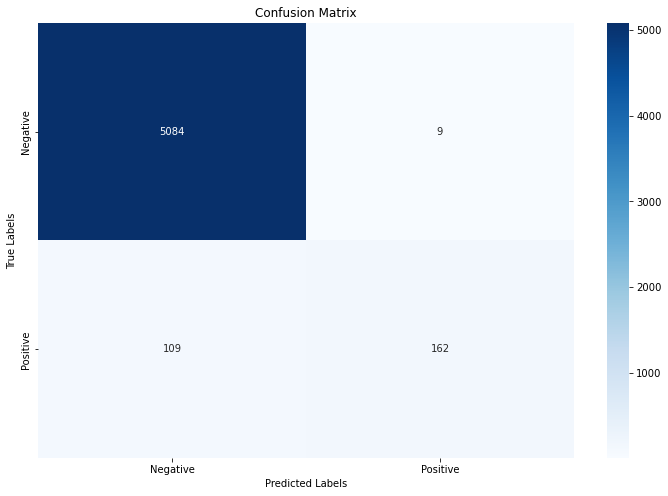

In [45]:
plt.figure(figsize=(12,8))

conf_matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

labels = ['Negative', 'Positive']
plt.xticks(np.arange(len(labels))+0.5, labels)
plt.yticks(np.arange(len(labels))+0.5, labels)

plt.show()


# Naive Bayes

In [46]:
proba , df_naive = pre.Naive_Bayes(df , target_name='fraudulent')

In [48]:
len(proba)

2

In [49]:
proba['probs_pos']

{'location': {'us': 0.24737732656514383,
  'stocton': 0.0010152284263959391,
  'ca': 0.05549915397631134,
  'gb': 0.01455160744500846,
  'lnd': 0.008798646362098138,
  'london': 0.009137055837563452,
  'pk': 0.0006768189509306261,
  'sd': 0.0013536379018612521,
  'karachi': 0.0006768189509306261,
  'bakersfield': 0.010490693739424704,
  'mt': 0.0020304568527918783,
  'poso': 0.0010152284263959391,
  'il': 0.006429780033840948,
  'hazelcrest': 0.0006768189509306261,
  'los': 0.010490693739424704,
  'angeles': 0.010490693739424704,
  'oh': 0.006429780033840948,
  'san': 0.021658206429780034,
  'jose': 0.006091370558375634,
  'fl': 0.011505922165820644,
  'tx': 0.05177664974619289,
  'houston': 0.032148900169204735,
  'mateo': 0.008460236886632826,
  'deweyville': 0.0013536379018612521,
  'pa': 0.0047377326565143825,
  'philadelphia': 0.0027072758037225042,
  'austin': 0.0077834179357022,
  'my': 0.004399323181049069,
  'nj': 0.00338409475465313,
  'newark': 0.0006768189509306261,
  'mi':

In [50]:
df_naive

,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,location_probs,company_profile_probs,description_probs,benefits_probs,employment_type_probs,job_field_probs,Requirements_probs
0,0,0,1,0,0,-0.737971,-17.654849,-16.313300,0.199597,0.377421,-3.559181,-4.487759
1,0,0,1,0,0,0.000000,-4.910586,-43.570776,3.974589,-0.148601,-1.883931,-24.693125
2,0,0,1,0,0,0.157113,-1.837206,1.609073,0.199597,0.377421,2.240216,24.970182
3,0,0,1,0,0,-1.451336,0.291504,-52.335503,-15.338880,-0.148601,-3.703835,-13.423200
4,0,0,1,1,0,2.211240,-13.015182,23.509370,0.733267,-0.148601,-2.199577,-3.549791
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,0,1,1,0,-0.091063,-64.594746,-52.869796,-19.275939,-0.148601,-2.341076,-15.405430
17876,0,0,1,1,0,0.273745,-28.566503,22.815193,-8.731849,-0.148601,6.117844,15.256880
17877,0,0,0,0,0,3.706812,-9.822105,29.158548,0.199597,-0.148601,7.571205,-18.144719
17878,0,0,0,1,0,0.456934,4.184395,-19.721938,-5.690263,-0.521367,-5.597253,-1.259510


In [51]:
x = df_naive.drop(['fraudulent'] , axis = 1)
y = df_naive['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)

In [64]:
model = RandomForestClassifier(n_estimators=200 , n_jobs=-1)
model.fit(x_train , y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [65]:
from sklearn.metrics import classification_report
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_report = classification_report(y_train , y_train_pred)
test_report = classification_report(y_test , y_test_pred)

print('Train Report', '\n', train_report)
print('Test Report', '\n', test_report)



Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      1.00      1.00       595

    accuracy                           1.00     12516
   macro avg       1.00      1.00      1.00     12516
weighted avg       1.00      1.00      1.00     12516

Test Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5093
           1       0.92      0.83      0.87       271

    accuracy                           0.99      5364
   macro avg       0.96      0.91      0.93      5364
weighted avg       0.99      0.99      0.99      5364



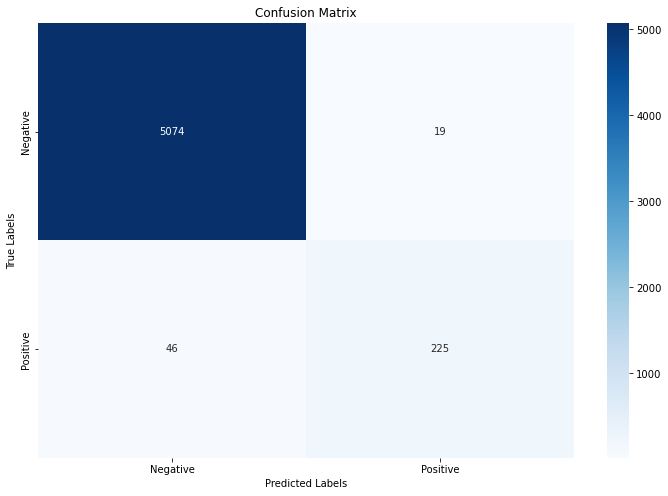

In [66]:
plt.figure(figsize=(12,8))

conf_matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

labels = ['Negative', 'Positive']
plt.xticks(np.arange(len(labels))+0.5, labels)
plt.yticks(np.arange(len(labels))+0.5, labels)

plt.show()
